In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import normaltest

In [3]:
df=pd.read_csv('D:\Project\Machine_learning_project1\data2.csv')

In [4]:
df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


#Checking the data and cleaning the data

In [5]:
df2=df.drop(labels=["id","test_id","program_id","trainee_id"],axis=1)

In [6]:
print(df.columns)

Index(['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')


In [7]:
Column_name=['id', 'program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating','is_pass']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [9]:
df["age"].describe()

count    45418.000000
mean        36.494033
std          9.041119
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [10]:
print("Gender:",set(df["gender"]))
print("Program Type:",set(df["program_type"]))
print("Program ID:",set(df["program_id"]))
print("Test Type:",set(df["test_type"]))


Gender: {'M', 'F'}
Program Type: {'Z', 'U', 'X', 'T', 'Y', 'V', 'S'}
Program ID: {'V_3', 'Z_1', 'U_2', 'V_1', 'X_3', 'U_1', 'Y_2', 'Y_4', 'X_2', 'S_1', 'T_4', 'X_1', 'Z_2', 'V_2', 'T_1', 'Y_1', 'T_3', 'Z_3', 'S_2', 'Y_3', 'V_4', 'T_2'}
Test Type: {'offline', 'online'}


In [11]:
print("Education:",set(df["education"]))
print("City Tier:",set(df["city_tier"]))
print("Total Programs enrolled:",set(df["total_programs_enrolled"]))
print("Handicapped:",set(df["is_handicapped"]))


Education: {'Bachelors', 'Masters', 'Matriculation', 'No Qualification', 'High School Diploma'}
City Tier: {1, 2, 3, 4}
Total Programs enrolled: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14}
Handicapped: {'N', 'Y'}


In [12]:
print("Trainee engagement rating:",set(df["trainee_engagement_rating"]))
print("Pass or fail:",set(df["is_pass"]))

Trainee engagement rating: {nan, 1.0, 2.0, 3.0, 4.0, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}
Pass or fail: {0, 1}


In [13]:
#replacing the NA value in the variable
df["trainee_engagement_rating"]=df["trainee_engagement_rating"].fillna(0)

In [14]:
#checking the typ of distribution of "age" variable

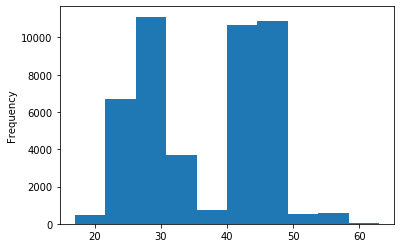

In [15]:
df["age"].plot(kind="hist")

In [16]:
normaltest(df["age"].dropna())

NormaltestResult(statistic=328366.48083609145, pvalue=0.0)

In [17]:
summary_percentage=pd.crosstab(df["test_type"],df["is_pass"],margins=True,normalize="all")*100
summary_percentage

is_pass,0,1,All
test_type,,,
offline,21.555224,37.972849,59.528074
online,8.903988,31.567939,40.471926
All,30.459212,69.540788,100.000000


In [18]:
difficulty_level_percentage=pd.crosstab(df["difficulty_level"],df["is_pass"],margins=True,normalize="all")*100
difficulty_level_percentage

is_pass,0,1,All
difficulty_level,,,
easy,14.407973,40.414508,54.822481
hard,4.679618,9.397515,14.077132
intermediate,9.751596,18.503835,28.255431
vary hard,1.620025,1.224931,2.844956
All,30.459212,69.540788,100.000000


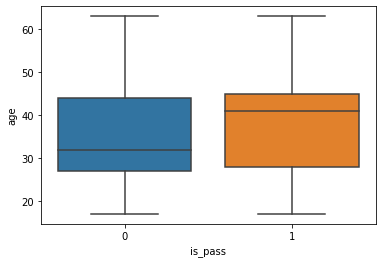

In [19]:
sns.boxplot(x=df["is_pass"],y=df["age"].dropna())
plt.show()

In [20]:
gender_percentage=pd.crosstab(df["gender"],df["is_pass"]).apply(lambda r: r/r.sum(), axis=1)
gender_percentage

is_pass,0,1
gender,,
F,0.314626,0.685374
M,0.295828,0.704172


In [21]:
gender_percentage=pd.crosstab(df["gender"],df["is_pass"],margins=True,normalize=True)*100
gender_percentage

is_pass,0,1,All
gender,,,
F,14.669091,31.954831,46.623922
M,15.790121,37.585957,53.376078
All,30.459212,69.540788,100.000000


In [22]:
education_percentage=pd.crosstab(df["education"],df["is_pass"],margins=True,normalize=True)*100
education_percentage

is_pass,0,1,All
education,,,
Bachelors,4.076722,11.755779,15.832502
High School Diploma,13.401780,33.587160,46.988940
Masters,0.116204,0.583756,0.699960
Matriculation,12.571944,23.203959,35.775903
No Qualification,0.292562,0.410133,0.702695
All,30.459212,69.540788,100.000000


In [23]:
trainee_rating_percentage=pd.crosstab(df["trainee_engagement_rating"],df["is_pass"],margins=True,normalize=True)*100
trainee_rating_percentage

is_pass,0,1,All
trainee_engagement_rating,,,
0.0,0.053317,0.051950,0.105267
1.0,14.293136,20.698046,34.991182
2.0,7.417939,16.142836,23.560775
3.0,4.139609,11.654613,15.794223
4.0,3.506637,14.420277,17.926914
5.0,1.048573,6.573065,7.621639
All,30.459212,69.540788,100.000000


In [24]:
program_type=pd.crosstab(df["program_type"],df["is_pass"],margins=True,normalize=True)*100
program_type

is_pass,0,1,All
program_type,,,
S,0.823000,0.989788,1.812788
T,7.602499,17.631619,25.234118
U,4.007000,6.685168,10.692168
V,7.374192,10.432417,17.806609
X,0.846241,3.703501,4.549742
Y,7.275760,23.566243,30.842003
Z,2.530521,6.532052,9.062573
All,30.459212,69.540788,100.000000


In [25]:
testtype_vs_difficulty=pd.crosstab(df["difficulty_level"],df["test_type"],margins=True,normalize=True)*100
testtype_vs_difficulty

test_type,offline,online,All
difficulty_level,,,
easy,14.350554,40.471926,54.822481
hard,14.077132,0.000000,14.077132
intermediate,28.255431,0.000000,28.255431
vary hard,2.844956,0.000000,2.844956
All,59.528074,40.471926,100.000000


In [26]:
#all the online test was easy. Therefore we can remove that data

In [27]:
programtype_vs_duration=pd.crosstab(df["program_type"],df["program_duration"],margins=True,normalize=True)*100
programtype_vs_duration

program_duration,117,120,121,122,130,131,133,134,135,136,All
program_type,,,,,,,,,,,
S,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.932369,0.880419,0.000000,1.812788
T,5.832092,6.551191,0.000000,0.000000,0.000000,4.309131,0.000000,8.541704,0.000000,0.000000,25.234118
U,0.000000,0.000000,0.000000,4.201129,0.000000,0.000000,0.000000,6.491039,0.000000,0.000000,10.692168
V,0.000000,0.000000,2.592041,5.879940,0.000000,4.674149,4.660478,0.000000,0.000000,0.000000,17.806609
X,0.000000,0.000000,1.058143,0.000000,0.000000,0.000000,0.000000,1.844231,0.000000,1.647368,4.549742
Y,0.000000,5.797914,6.847854,0.000000,0.000000,0.000000,0.000000,0.000000,9.054370,9.141865,30.842003
Z,0.000000,2.866830,0.000000,0.000000,3.635146,0.000000,0.000000,0.000000,0.000000,2.560597,9.062573
All,5.832092,15.215935,10.498038,10.081070,3.635146,8.983280,4.660478,17.809343,9.934789,13.349830,100.000000


In [28]:
summary=pd.crosstab(df["is_pass"],df["program_duration"])
summary

program_duration,117,120,121,122,130,131,133,134,135,136
is_pass,,,,,,,,,,
0,1107,2887,2090,3063,707,3001,1320,3868,2013,2224
1,3159,8243,5589,4311,1952,3570,2089,9159,5254,7541


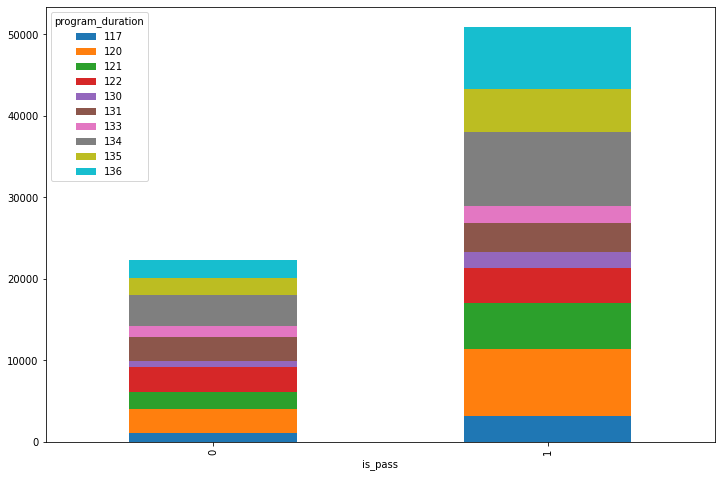

In [29]:
plt.rcParams["figure.figsize"]=[12,8]
summary.plot(kind="bar",stacked=True)
plt.show()

In [30]:
df2=df2.drop("test_type",axis=1)

In [31]:
#since the no. fo handicapped is very small and also the ratio of the pass and fail is in line for handicapped and non-handicapped, the feature is not being considered.

In [32]:
handicapped=pd.crosstab(df["is_pass"],df["is_handicapped"]).apply(lambda x:x/x.sum(),axis=0)
handicapped

is_handicapped,N,Y
is_pass,,
0,0.299247,0.358752
1,0.700753,0.641248


In [33]:
df2=df2.drop("is_handicapped",axis=1)

In [34]:
df2["trainee_engagement_rating"].fillna(0,inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 10 columns):
program_type                 73147 non-null object
program_duration             73147 non-null int64
difficulty_level             73147 non-null object
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 5.6+ MB


In [36]:
df2["age"].describe()

count    45418.000000
mean        36.494033
std          9.041119
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [37]:
df2["age"].fillna(36.49,inplace=True)

In [38]:
df2['total_programs_enrolled']=np.where(df2['total_programs_enrolled'] ==1, '<=3',df2["total_programs_enrolled"])  
for i in range (2,15):
    if i<4:
        df2['total_programs_enrolled']=np.where(df2['total_programs_enrolled'] ==str(i),'<=3',df2['total_programs_enrolled'])
    elif i<7:
        df2['total_programs_enrolled']=np.where(df2['total_programs_enrolled'] ==str(i),'[4-6]',df2['total_programs_enrolled'])
    elif i<10:
        df2['total_programs_enrolled']=np.where(df2['total_programs_enrolled'] ==str(i),'[7-9]',df2['total_programs_enrolled'])
    else:
        df2['total_programs_enrolled']=np.where(df2['total_programs_enrolled'] ==str(i),'> 9',df2['total_programs_enrolled'])
    i+=1

In [39]:
df2.drop("gender",axis=1,inplace=True)

In [40]:
df2.drop(["program_type","city_tier"],axis=1,inplace=True)

In [41]:
program_duration=df2["program_duration"].unique()

In [42]:
df2['program_duration']=np.where(df2['program_duration'] ==117, '<120',df2["program_duration"])  
for i in program_duration:
    if i<130:
        df2['program_duration']=np.where(df2["program_duration"] ==str(i),'[120 - 130)',df2["program_duration"])
    else:
        df2["program_duration"]=np.where(df2["program_duration"]==str(i),'>=130',df2["program_duration"])

In [43]:
df2["program_duration"].unique()

array(['>=130', '[120 - 130)', '<120'], dtype=object)

In [44]:
df2.head()

,program_duration,difficulty_level,education,age,total_programs_enrolled,trainee_engagement_rating,is_pass
0,>=130,intermediate,Matriculation,24.00,[4-6],1.0,0
1,>=130,easy,High School Diploma,26.00,<=3,3.0,1
2,[120 - 130),easy,Matriculation,40.00,<=3,2.0,1
3,<120,easy,Matriculation,36.49,[4-6],1.0,1
4,>=130,intermediate,High School Diploma,42.00,<=3,4.0,1


### create dummy variables


In [45]:
cat_vars=["difficulty_level","education","total_programs_enrolled","trainee_engagement_rating",'program_duration']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df2[var], prefix=var,drop_first=True)
    data1=df2.join(cat_list)
    df2=data1
cat_vars=["difficulty_level","education","total_programs_enrolled","trainee_engagement_rating","program_duration"]
data_vars=df2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [46]:
data_final=df2[to_keep]
data_final.columns.values

array(['age', 'is_pass', 'difficulty_level_hard',
       'difficulty_level_intermediate', 'difficulty_level_vary hard',
       'education_High School Diploma', 'education_Masters',
       'education_Matriculation', 'education_No Qualification',
       'total_programs_enrolled_> 9', 'total_programs_enrolled_[4-6]',
       'total_programs_enrolled_[7-9]', 'trainee_engagement_rating_1.0',
       'trainee_engagement_rating_2.0', 'trainee_engagement_rating_3.0',
       'trainee_engagement_rating_4.0', 'trainee_engagement_rating_5.0',
       'program_duration_>=130', 'program_duration_[120 - 130)'],
      dtype=object)

In [47]:
Y=data_final['is_pass']
X=data_final.drop(['is_pass'],axis=1)

In [48]:
data_final.head()

,age,is_pass,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,total_programs_enrolled_> 9,total_programs_enrolled_[4-6],total_programs_enrolled_[7-9],trainee_engagement_rating_1.0,trainee_engagement_rating_2.0,trainee_engagement_rating_3.0,trainee_engagement_rating_4.0,trainee_engagement_rating_5.0,program_duration_>=130,program_duration_[120 - 130)
0,24.00,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,26.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,40.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,36.49,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,42.00,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\brvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions=logmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[  966,  6425],
       [  592, 16156]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7093085877625419

In [53]:
to_predict=pd.read_csv("D:\Project\Machine_learning_project1\data1.csv")

In [54]:
for_submission=to_predict.copy()

In [55]:
to_predict.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [56]:
to_predict.drop(["id","test_id","program_id","trainee_id","is_handicapped","program_type","city_tier","gender"],axis=1,inplace=True)

In [57]:
to_predict.drop(["test_type"],axis=1,inplace=True)

In [58]:
to_predict['total_programs_enrolled']=np.where(to_predict['total_programs_enrolled'] ==1, '<=3',to_predict["total_programs_enrolled"])  
for i in range (2,15):
    if i<4:
        to_predict['total_programs_enrolled']=np.where(to_predict['total_programs_enrolled'] ==str(i),'<=3',to_predict['total_programs_enrolled'])
    elif i<7:
        to_predict['total_programs_enrolled']=np.where(to_predict['total_programs_enrolled'] ==str(i),'[4-6]',to_predict['total_programs_enrolled'])
    elif i<10:
        to_predict['total_programs_enrolled']=np.where(to_predict['total_programs_enrolled'] ==str(i),'[7-9]',to_predict['total_programs_enrolled'])
    else:
        to_predict['total_programs_enrolled']=np.where(to_predict['total_programs_enrolled'] ==str(i),'> 9',to_predict['total_programs_enrolled'])
    i+=1

In [59]:
program_duration=to_predict["program_duration"].unique()

In [60]:
to_predict['program_duration']=np.where(to_predict['program_duration'] ==117, '<120',to_predict["program_duration"])  
for i in program_duration:
    if i<130:
        to_predict['program_duration']=np.where(to_predict["program_duration"] ==str(i),'[120 - 130)',to_predict["program_duration"])
    else:
        to_predict["program_duration"]=np.where(to_predict["program_duration"]==str(i),'>=130',to_predict["program_duration"])

In [61]:
to_predict["program_duration"].unique()

array(['>=130', '[120 - 130)', '<120'], dtype=object)

In [62]:
cat_vars=["difficulty_level","education","total_programs_enrolled","trainee_engagement_rating",'program_duration']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(to_predict[var], prefix=var)
    data1=to_predict.join(cat_list)
    to_predict=data1
cat_vars=["difficulty_level","education","total_programs_enrolled","trainee_engagement_rating","program_duration"]
data_vars=to_predict.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [63]:
final=to_predict[to_keep]
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 22 columns):
age                              19558 non-null float64
difficulty_level_easy            31349 non-null uint8
difficulty_level_hard            31349 non-null uint8
difficulty_level_intermediate    31349 non-null uint8
difficulty_level_vary hard       31349 non-null uint8
education_Bachelors              31349 non-null uint8
education_High School Diploma    31349 non-null uint8
education_Masters                31349 non-null uint8
education_Matriculation          31349 non-null uint8
education_No Qualification       31349 non-null uint8
total_programs_enrolled_<=3      31349 non-null uint8
total_programs_enrolled_> 9      31349 non-null uint8
total_programs_enrolled_[4-6]    31349 non-null uint8
total_programs_enrolled_[7-9]    31349 non-null uint8
trainee_engagement_rating_1.0    31349 non-null uint8
trainee_engagement_rating_2.0    31349 non-null uint8
trainee_engagement_rating

In [64]:
final["age"].describe()

count    19558.000000
mean        36.440894
std          9.055208
min         17.000000
25%         28.000000
50%         39.000000
75%         45.000000
max         63.000000
Name: age, dtype: float64

In [65]:
final["age"].fillna(36.44,inplace=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 22 columns):
age                              31349 non-null float64
difficulty_level_easy            31349 non-null uint8
difficulty_level_hard            31349 non-null uint8
difficulty_level_intermediate    31349 non-null uint8
difficulty_level_vary hard       31349 non-null uint8
education_Bachelors              31349 non-null uint8
education_High School Diploma    31349 non-null uint8
education_Masters                31349 non-null uint8
education_Matriculation          31349 non-null uint8
education_No Qualification       31349 non-null uint8
total_programs_enrolled_<=3      31349 non-null uint8
total_programs_enrolled_> 9      31349 non-null uint8
total_programs_enrolled_[4-6]    31349 non-null uint8
total_programs_enrolled_[7-9]    31349 non-null uint8
trainee_engagement_rating_1.0    31349 non-null uint8
trainee_engagement_rating_2.0    31349 non-null uint8
trainee_engagement_rating

C:\Users\brvis\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [66]:
data_final.head()

,age,is_pass,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,total_programs_enrolled_> 9,total_programs_enrolled_[4-6],total_programs_enrolled_[7-9],trainee_engagement_rating_1.0,trainee_engagement_rating_2.0,trainee_engagement_rating_3.0,trainee_engagement_rating_4.0,trainee_engagement_rating_5.0,program_duration_>=130,program_duration_[120 - 130)
0,24.00,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0
1,26.00,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,40.00,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,36.49,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,42.00,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [67]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 19 columns):
age                              73147 non-null float64
is_pass                          73147 non-null int64
difficulty_level_hard            73147 non-null uint8
difficulty_level_intermediate    73147 non-null uint8
difficulty_level_vary hard       73147 non-null uint8
education_High School Diploma    73147 non-null uint8
education_Masters                73147 non-null uint8
education_Matriculation          73147 non-null uint8
education_No Qualification       73147 non-null uint8
total_programs_enrolled_> 9      73147 non-null uint8
total_programs_enrolled_[4-6]    73147 non-null uint8
total_programs_enrolled_[7-9]    73147 non-null uint8
trainee_engagement_rating_1.0    73147 non-null uint8
trainee_engagement_rating_2.0    73147 non-null uint8
trainee_engagement_rating_3.0    73147 non-null uint8
trainee_engagement_rating_4.0    73147 non-null uint8
trainee_engagement_rating

In [68]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 22 columns):
age                              31349 non-null float64
difficulty_level_easy            31349 non-null uint8
difficulty_level_hard            31349 non-null uint8
difficulty_level_intermediate    31349 non-null uint8
difficulty_level_vary hard       31349 non-null uint8
education_Bachelors              31349 non-null uint8
education_High School Diploma    31349 non-null uint8
education_Masters                31349 non-null uint8
education_Matriculation          31349 non-null uint8
education_No Qualification       31349 non-null uint8
total_programs_enrolled_<=3      31349 non-null uint8
total_programs_enrolled_> 9      31349 non-null uint8
total_programs_enrolled_[4-6]    31349 non-null uint8
total_programs_enrolled_[7-9]    31349 non-null uint8
trainee_engagement_rating_1.0    31349 non-null uint8
trainee_engagement_rating_2.0    31349 non-null uint8
trainee_engagement_rating

In [69]:
cat_vars=data_final.columns.values.tolist()
data_vars=final.columns.values.tolist()


In [70]:
cat_vars

['age',
 'is_pass',
 'difficulty_level_hard',
 'difficulty_level_intermediate',
 'difficulty_level_vary hard',
 'education_High School Diploma',
 'education_Masters',
 'education_Matriculation',
 'education_No Qualification',
 'total_programs_enrolled_> 9',
 'total_programs_enrolled_[4-6]',
 'total_programs_enrolled_[7-9]',
 'trainee_engagement_rating_1.0',
 'trainee_engagement_rating_2.0',
 'trainee_engagement_rating_3.0',
 'trainee_engagement_rating_4.0',
 'trainee_engagement_rating_5.0',
 'program_duration_>=130',
 'program_duration_[120 - 130)']

In [71]:
to_keep=[i for i in data_vars if i not in cat_vars]

In [72]:
to_keep

['difficulty_level_easy',
 'education_Bachelors',
 'total_programs_enrolled_<=3',
 'program_duration_<120']

In [73]:
final.drop(to_keep,axis=1,inplace=True)

C:\Users\brvis\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 18 columns):
age                              31349 non-null float64
difficulty_level_hard            31349 non-null uint8
difficulty_level_intermediate    31349 non-null uint8
difficulty_level_vary hard       31349 non-null uint8
education_High School Diploma    31349 non-null uint8
education_Masters                31349 non-null uint8
education_Matriculation          31349 non-null uint8
education_No Qualification       31349 non-null uint8
total_programs_enrolled_> 9      31349 non-null uint8
total_programs_enrolled_[4-6]    31349 non-null uint8
total_programs_enrolled_[7-9]    31349 non-null uint8
trainee_engagement_rating_1.0    31349 non-null uint8
trainee_engagement_rating_2.0    31349 non-null uint8
trainee_engagement_rating_3.0    31349 non-null uint8
trainee_engagement_rating_4.0    31349 non-null uint8
trainee_engagement_rating_5.0    31349 non-null uint8
program_duration_>=130   

In [75]:
predictions_final=logmodel.predict(final)

In [76]:
final["is_pass"]=predictions_final

C:\Users\brvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
final.head()

,age,difficulty_level_hard,difficulty_level_intermediate,difficulty_level_vary hard,education_High School Diploma,education_Masters,education_Matriculation,education_No Qualification,total_programs_enrolled_> 9,total_programs_enrolled_[4-6],total_programs_enrolled_[7-9],trainee_engagement_rating_1.0,trainee_engagement_rating_2.0,trainee_engagement_rating_3.0,trainee_engagement_rating_4.0,trainee_engagement_rating_5.0,program_duration_>=130,program_duration_[120 - 130),is_pass
0,46.00,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1,36.44,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
2,36.44,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
3,36.44,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,36.44,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1


In [85]:
for_submission["is_pass"]=predictions_final

In [88]:
for_submission.columns.values.tolist()

['id',
 'program_id',
 'program_type',
 'program_duration',
 'test_id',
 'test_type',
 'difficulty_level',
 'trainee_id',
 'gender',
 'education',
 'city_tier',
 'age',
 'total_programs_enrolled',
 'is_handicapped',
 'trainee_engagement_rating',
 'is_pass']

In [89]:
for_submission.drop([
 'program_id',
 'program_type',
 'program_duration',
 'test_id',
 'test_type',
 'difficulty_level',
 'trainee_id',
 'gender',
 'education',
 'city_tier',
 'age',
 'total_programs_enrolled',
 'is_handicapped',
 'trainee_engagement_rating'],axis=1,inplace=True)

In [91]:
for_submission.to_csv("D:\Project\Machine_learning_project1\submission.csv")